In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import yfinance as yf 
import datetime as dt 
import os 

#Create directory to store today's plots
_today = dt.datetime.today().strftime('%Y-%m-%d')
directory = f'/Users/talhajamal/Desktop/Code/Daily_Market_Update/data/{_today}'
print(directory)
# Create the directory if it does not exist
if not os.path.exists(directory):
    os.makedirs(directory)

/Users/talhajamal/Desktop/Code/Daily_Market_Update/data/2023-12-24


In [2]:
# Get SP500 Tickers
sp500 = pd.read_csv('/Users/talhajamal/Desktop/Code/Daily_Market_Update/data/sp500.csv')
sp500_tickers = ','.join(sp500['Symbol']).replace(',',' ')

In [3]:
# 1 Year Data
data = yf.download(sp500_tickers, period='2y')

[*********************100%%**********************]  503 of 503 completed


2 Failed downloads:
['BRK.B']: Exception('%ticker%: No data found, symbol may be delisted')
['BF.B']: Exception('%ticker%: No price data found, symbol may be delisted (period=2y)')


In [4]:
# Performance Metrics
performance_metrics = {
    '1d': data['Adj Close'].pct_change(fill_method=None).tail(1) * 100,
    '1w': data['Adj Close'].pct_change(fill_method=None, periods=5).tail(1) * 100,
    '1m': data['Adj Close'].pct_change(fill_method=None, periods=21).tail(1) * 100,
    '1y': data['Adj Close'].pct_change(fill_method=None, periods=252).tail(1) * 100
}

In [5]:
# Find top 10 performing stocks for each period
top_performers = {period: metric.iloc[0].nlargest(10) for period, metric in performance_metrics.items()}

In [6]:
one_day_performance = top_performers['1d']
one_week_performance = top_performers['1w']
one_month_performance = top_performers['1m']
one_year_performance = top_performers['1y']

ANSS 18.08286273321169
MRNA 4.09170203784166
ALB 3.1900993379185616
ALLE 2.528250188067882
BMY 2.0093691527911295
INTC 1.9541166804680765
INCY 1.8803693843978841
RVTY 1.8437943540605906
EXPD 1.7683788786169163
AMGN 1.729143780484943


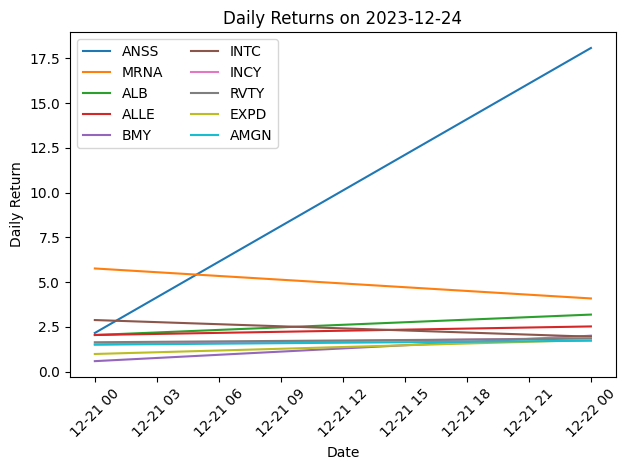

In [14]:
# Plot of best performing stocks over 1 Day
for ticker, ret in one_day_performance.items():
    #Calculate Daily Return
    print(ticker, ret)
    plt.plot(data['Adj Close'][ticker].pct_change().tail(2) * 100, label=ticker)
plt.title('Daily Returns on '+_today)
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.ylabel('Daily Return')
plt.legend(loc='upper left', ncol=2)
plt.tight_layout()
_filename = '1D_performance.png'
_full_path = os.path.join(directory, _filename)
plt.savefig(_full_path)
plt.show()


ANSS 21.156127358910037
MRNA 10.324377436188193
ILMN 10.149489914042364
JCI 8.199853478958175
ENPH 8.12621648887526
ALLE 7.317908738234302
GOOGL 6.704373288420795
PFE 6.646641057245595
GOOG 6.634791636122106
ALGN 6.611505812922003


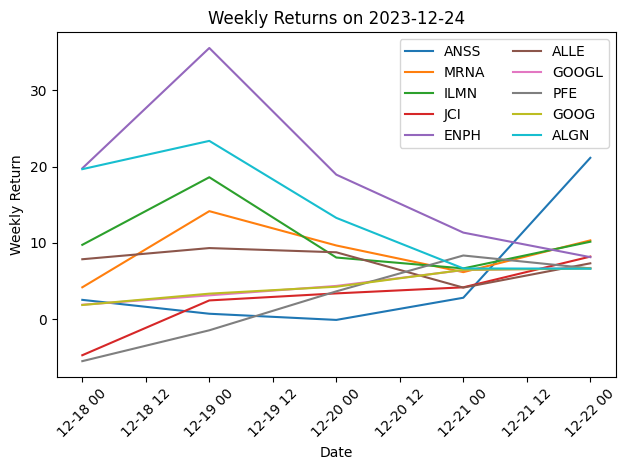

In [15]:
# Plot of best performing stocks over 1 Week
for ticker, ret in one_week_performance.items():
    print(ticker, ret)
    plt.plot(data['Adj Close'][ticker].pct_change(periods=5).tail(5) * 100, label=ticker)
plt.title('Weekly Returns on ' + _today)
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.ylabel('Weekly Return')
plt.legend(loc='upper right', ncol=2)
plt.tight_layout()
_filename = '1W_performance.png'
_full_path = os.path.join(directory, _filename)
plt.savefig(_full_path)
plt.show()

NCLH 45.587215170989694
BBWI 45.52515793438978
ILMN 43.20785284446627
ENPH 33.72256444516255
BXP 31.289372633525538
CCL 30.82239084894478
GM 28.551174518230592
DFS 28.356651204944928
CMA 28.141767256543847
ZION 27.86980585618668


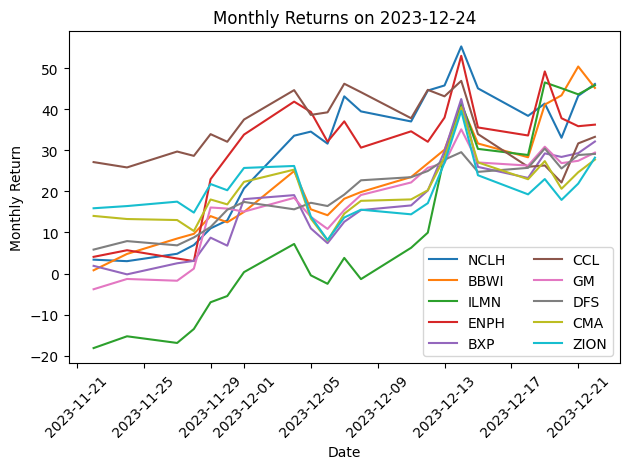

In [16]:
# Plot of best performing stocks over 1 Month
for ticker, ret in one_month_performance.items():
    print(ticker, ret)
    plt.plot(data['Adj Close'][ticker].pct_change(periods=22).tail(22) * 100, label=ticker)
plt.title('Monthly Returns on '+_today)
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.ylabel('Monthly Return')
plt.legend(loc='lower right', ncol=2)
plt.tight_layout()
_filename = '1M_performance.png'
_full_path = os.path.join(directory, _filename)
plt.savefig(_full_path)
plt.show()

NVDA 196.0527323693486
META 195.08183729526502
BLDR 152.819352434538
RCL 147.46188634529113
UBER 143.33595267850106
PHM 125.87009677331436
CCL 123.23114772460943
AMD 106.26478350184021
AVGO 104.46445553507732
CRM 104.40521112811867


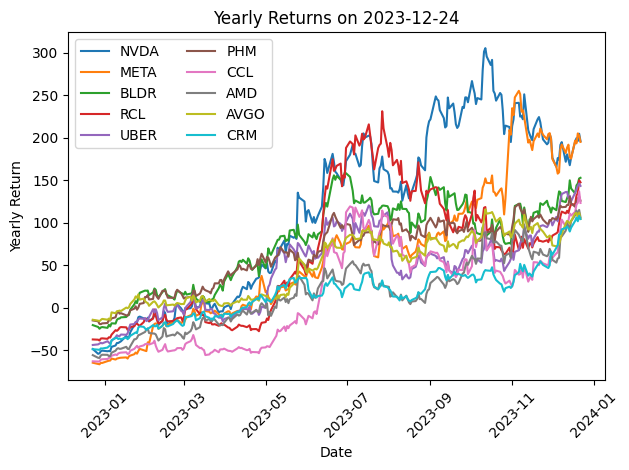

In [18]:
# Plot of best performing stocks over 1 Year
for ticker, ret in one_year_performance.items():
    print(ticker, ret)
    plt.plot(data['Adj Close'][ticker].pct_change(periods=252).tail(252) * 100, label=ticker)
plt.title('Yearly Returns on '+_today)
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.ylabel('Yearly Return')
plt.legend(loc='upper left', ncol=2)
plt.tight_layout()
_filename = '1Y_performance.png'
_full_path = os.path.join(directory, _filename)
plt.savefig(_full_path)
plt.show()

In [13]:
sp500

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
3,ABBV,AbbVie,Health Care,Biotechnology,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989
...,...,...,...,...,...,...,...,...
498,YUM,Yum! Brands,Consumer Discretionary,Restaurants,"Louisville, Kentucky",1997-10-06,1041061,1997
499,ZBRA,Zebra Technologies,Information Technology,Electronic Equipment & Instruments,"Lincolnshire, Illinois",2019-12-23,877212,1969
500,ZBH,Zimmer Biomet,Health Care,Health Care Equipment,"Warsaw, Indiana",2001-08-07,1136869,1927
501,ZION,Zions Bancorporation,Financials,Regional Banks,"Salt Lake City, Utah",2001-06-22,109380,1873


In [14]:
sp500['GICS Sector'].value_counts()

GICS Sector
Industrials               78
Financials                72
Health Care               64
Information Technology    64
Consumer Discretionary    53
Consumer Staples          38
Real Estate               31
Utilities                 30
Materials                 28
Energy                    23
Communication Services    22
Name: count, dtype: int64

In [15]:
sp500['GICS Sub-Industry'].value_counts()

GICS Sub-Industry
Health Care Equipment                           18
Semiconductors                                  15
Electric Utilities                              14
Industrial Machinery & Supplies & Components    14
Multi-Utilities                                 12
                                                ..
Technology Distributors                          1
Leisure Products                                 1
Consumer Electronics                             1
Copper                                           1
Household Appliances                             1
Name: count, Length: 127, dtype: int64